# Section 4

###### V. Hunter Adams

In [7]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from matplotlib import animation, rc
from IPython.core.display import HTML 
from IPython.display import HTML
from ipywidgets import *
from scipy.integrate import odeint
import plotly.plotly as py
import plotly
from numpy.linalg import pinv
import plotly.graph_objs as go
import pandas as pd
import plotly.tools as tls
import urllib2
from IPython.display import Image
tls.set_credentials_file(username='v.h.adams', api_key='werEw55EhyYuY92HZtTt')

## This and That

1. What did you think of the prelim?

2. If you turn in assignment on blackboard, upload a pdf. Not a bunch of images.

3. Pick up your homework, that's how I'm taking attendance

## Parallax and Parsecs

*"You've never heard of the Millennium Falcon?…It's the ship that made the Kessel Run in less than twelve parsecs."* - Han Solo

A *parsec* is a unit of distance. I have no clue what Han Solo was talking about.

A parsec is related to parallax, which is the apparent relative motion of stationary objects as you change your point of view of the objects. If you walk back and forth in the front of a classroom, the students in the front of the classroom appear to move more than the students in the back of the classroom. Objects that are *extremely* far away don't appear to move at all.

The amount of apparent motion of a nearer object relative to those extremely distant, basically stationary objects can tell you how far away the nearer object is. Consider this geometry:

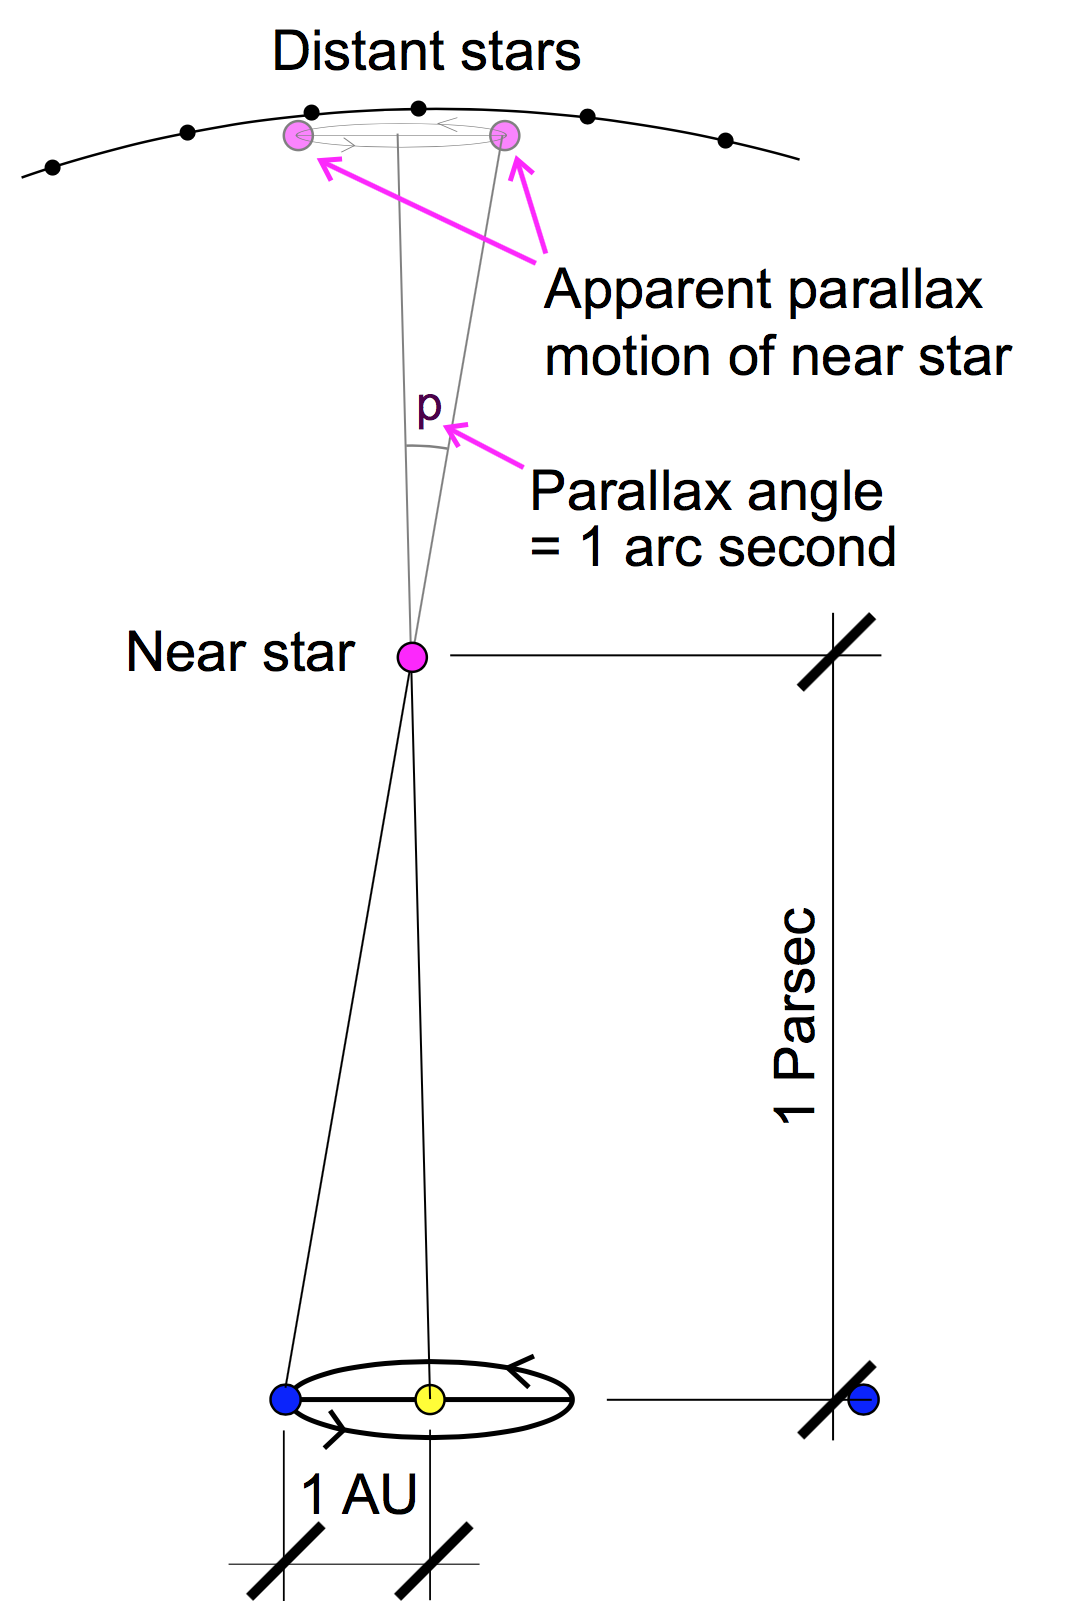

In [10]:
PATH = "/Users/hunteradams/Documents/PhD Semester 5/Sections/"
Image(filename = PATH + "parsec.png", width=400, height=400)

The relationshi between the parallax angle and the distances is given by:

\begin{align}
\tan{p} &= \frac{1AU}{D(AU)}\\
\end{align}

But, $p$ is really small, so we can approximate:

\begin{align}
p &= \frac{1AU}{D(AU)}\\
\end{align}

Solving for $D$:

\begin{align}
D(AU) = \frac{1AU}{p}
\end{align}

A *parsec* is the distance associated with a $p$ of one arcsecond. The above equation returns $D$ in AU, given $p$ in radians. Substituting in 1 arcsecond, we get:

\begin{align}
1 parsec &= \left[\frac{1AU}{1''}\cdot\frac{60''}{1'}\cdot\frac{60'}{1deg}\cdot\frac{360deg}{2\pi rad}\right]AU\\
&= \left[\frac{648000}{\pi}\right]AU\\
&= 206265 AU
\end{align}

where $p$ is measured in arcseconds. To get the distance in parsecs:

\begin{align}
D(parsec) &= \left[\frac{1AU}{p''}\cdot\frac{60''}{1'}\cdot\frac{60'}{1deg}\cdot\frac{360deg}{2\pi rad}\right]AU\cdot\left[\frac{1''}{1AU}\cdot\frac{1'}{60''}\cdot\frac{1deg}{60'}\cdot\frac{2\pi rad}{360deg}\right]\frac{parsec}{AU}\\
&= \frac{1parsec}{p(arcsec)}
\end{align}

So to get distance in parsec from a parallax angle, divide 1 by that parallax angle (measured in arcsec).

## Luminosity, Stephan-Boltzmann, and Brightness

#### Luminosity

*Luminosity* is the total amount of energy emitted by a star per unit time. Remember Stephan Boltzmann from last week's homework? What were the units?

\begin{align}
F &= \sigma T^4 \left[ \frac{\text{energy}}{\text{time}\cdot\text{area}}\right]
\end{align}

So, to get the total energy emitted by a star per unit time, we multiply by the surface area of the star ($4\pi R^2$):

\begin{align}
L &= \sigma T^4 A\left[\frac{\text{energy}}{\text{time}}\right]\\
&= 4\pi R^2 \sigma T^4
\end{align}

#### Radius and Temperature

Does luminosity change depending how far away you are from the star? No. It's an intrinsic property of the star. Sometimes, it's useful to use units of solar luminosities.

\begin{align}
\frac{L}{L_{sun}} &= \frac{4\pi R^2 \sigma T^4}{4\pi R_{s}^2 \sigma T_s^4}\\
&= \left(\frac{R}{R_s}\right)^2 \cdot \left(\frac{T}{T_{s}}\right)^4
\end{align}

#### Luminosity and Mass

Look at the stuff that luminosity depends on. Size of the star (R) and temperature of the star (T). For stars in the Main Sequence, the mass of the star is related to these things.

\begin{align}
L \propto M^{3.5}
\end{align}

So, in solar luminosities:

\begin{align}
\frac{L}{L_{sun}} &= \left(\frac{M}{M_s}\right)^{3.5}
\end{align}

#### Luminosity and Brightness

Luminosity is the total amount of energy coming off of a star per unit time. In other words, if you were to wrap the star in a big sphere and measure the energy going through the entire surface of that sphere at each moment in time, you would get the luminosity of the star. But that's not how we observe stars.

We observe stars from some distance $d$ away. All of the energy coming off of the star is distributed over the surface of a large sphere of radius $d$ by the time that it reaches us.

Flux:

\begin{align}
B &= \frac{L}{4\pi d^2}
\end{align}

Take ratio with solar flux:

\begin{align}
\frac{B}{B_{sun}} &= \frac{L}{4\pi d^2}\cdot \frac{4\pi d_{s}^2}{L_s}\\
&= \frac{L}{L_s}\cdot\left(\frac{d}{d_s}\right)^2
\end{align}

Rearranging:

\begin{align}
\frac{L_s}{L} &= \frac{B_s}{B}\cdot \left(\frac{d}{d_s}\right)^2
\end{align}

Reciprocating:

\begin{align}
\frac{L}{L_s} &= \frac{B}{B_s} \cdot \left(\frac{d_s}{d}\right)^2
\end{align}

## Exoplanet Transits

The brightness of a star, as we've considered it so far, is a function purely of the distance to the star and the luminosity of the star. It can be affected by other things too, however. Namely, eclipses by intervening bodies like exoplanets. During a transit, you'd expect to see the brightness do something like this:

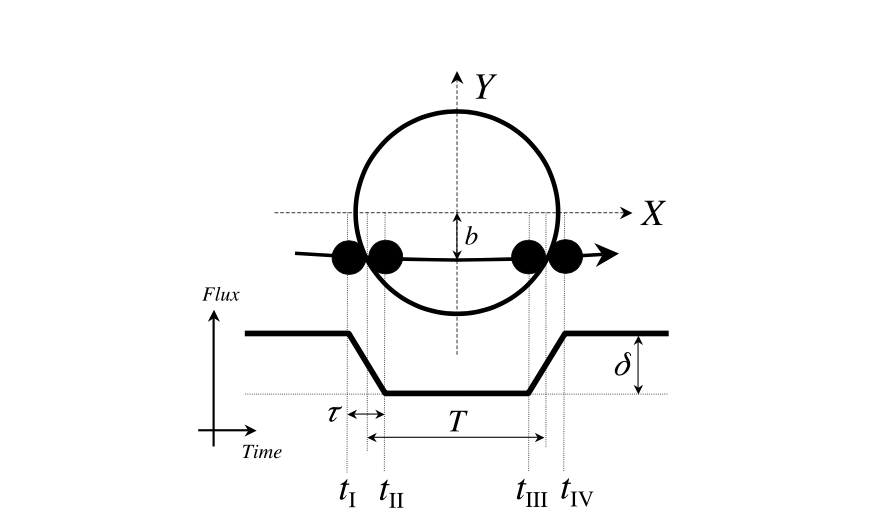

In [13]:
Image(filename = PATH + "transit.png", width=600, height=600)

How much does it dip? The dip is proportional to:

\begin{align}
\Delta B &= \frac{r^2}{R^2}
\end{align}

where $r$ is the exoplanet radius, and $R$ is the star radius.

#### Limb Darkening

In reality, the brightness will look moer like this. You can see that the bottom is curved rather than flat. This is due to the fact that there is more energy (flux) coming from the center of the disk of the star than the edges.

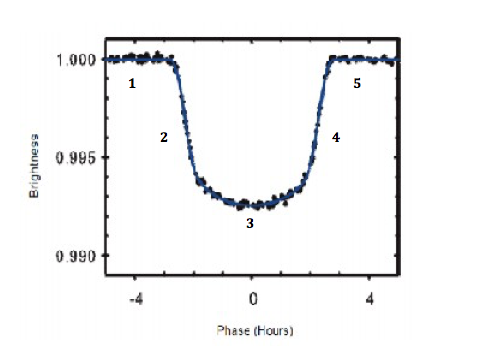

In [14]:
Image(filename = PATH + "limb.png", width=600, height=600)

## Detecting Exoplanets with Doppler

A star and a planet actually orbit one another about their center of mass. As such, the star will wobble (move around in a small circle). When the star is moving towards the Earth, we see its light blueshifted. When the star is moving away, we see it redshifted.

*What are the points of maximum blueshift and maximum redshift throughout an orbit?*

#### Getting Planet Orbital Period

*What will the plot of change in star velocity look like, and how can you get orbital period of the planet from that?*

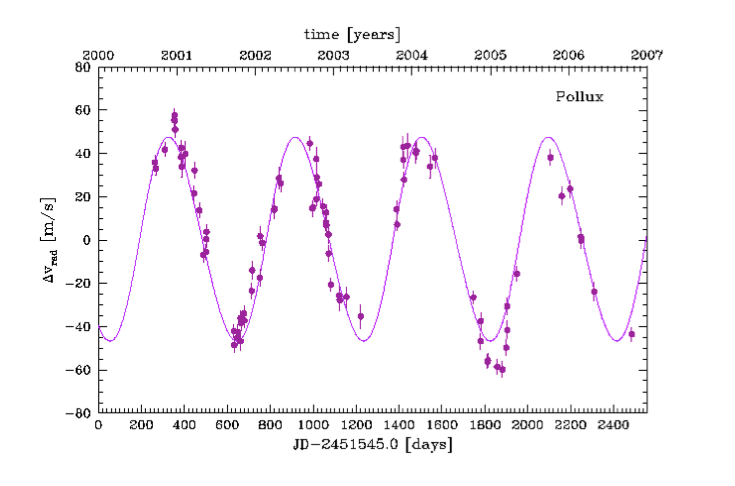

In [15]:
Image(filename = PATH + "dop.png", width=600, height=600)

#### Getting Star Mass

From the Mass-Luminosity Law, we can find the mass of this star.

1. Measure brightness

2. Measure distance (parallax, perhaps)

3. Find luminosity

4. Find mass

#### Getting semimajor axis

Kepler's Third Law then gives us the mass.

\begin{align}
P^{2} = a^{3}\frac{4 \pi^2}{G\left(M + m\right)} \approx a^{3}\frac{4 \pi^2}{GM}
\end{align}

#### Getting Planet Orbital Velocity

If you know the period (how long it takes to complete an orbit), and you know the semimajor axis, you can get an approximation for the orbital speed of the planet. Assume a circular orbit, find the circumference, and divide by the period.

#### Getting Star Relative Velocity

Comes directly from the doppler shift plot.

\begin{align}
v_{*}
\end{align}

#### Getting Mass of Planet

Use conservation of momentum to solve for planet mass

\begin{align}
M_pv_p &= M_{*}v_{*}
\end{align}

\begin{align}
\frac{M_p}{M_{*}} &= \frac{v_{*}}{v_{p}}
\end{align}

## Something to Note!

What is the implicit assumption here?

We've assumed that the star is moving entirely in the radial direction. In reality, the star's relative velocity could be much higher (if the planet isn't orbiting directly in the plane). This means $v_{*}$ could be higher than we measured, and $M_p$ could be larger. This places a *lower bound* on the planet mass.